In [1]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

!whoami
!date

alibow
Wed Apr  1 16:43:38 PDT 2020


# 1. Exploring the output and doing spot-check validation on the intervention results

In [2]:
output_dirs = ['/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/ethiopia/2020_03_26_08_33_10/count_data/',
              '/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/india/2020_03_26_21_28_29/count_data/',
              '/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/nigeria/2020_03_24_23_27_55/count_data/']

locations = ['Ethiopia','India','Nigeria']

In [3]:
# View mortality rates for Ethiopia

index_columns = ['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[0] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[0] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
    # note: exclude folic_acid_fortification results here because I tested and 
    # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','vitamin_a_fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','vitamin_a_fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                         vitamin_a_fortification_group age_group               
baseline                         covered                       1_to_4            0.0   
                                                               early_neonatal   10.0   
                                                               late_neonatal    10.0   
                                                               post_neonatal    10.0   
                                 effectively_covered           1_to_4           15.0   
                                                               early_neonatal   15.0   
                                                               late_neonatal    15.0   
                                                               post_neonatal    15.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
vitamin_a_fortification_scale_up covered                       1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   

                                                                                        mean  \
scenario                         vitamin_a_fortification_group age_group                       
baseline                         covered                       1_to_4                    NaN   
                                                               early_neonatal  815774.016087   
                                                               late_neonatal   148473.206181   
                                                               post_neonatal    95282.235288   
                                 effectively_covered           1_to_4              45.230929   
                                                               early_neonatal       0.000000   
                                                               late_neonatal        0.000000   
                                                               post_neonatal      119.189057   
                                 uncovered                     1_to_4              76.706558   
                                                               early_neonatal   14498.512157   
                                                               late_neonatal     1321.121251   
                                                               post_neonatal      357.410666   
vitamin_a_fortification_scale_up covered                       1_to_4               0.000000   
                                                               early_neonatal  811096.091149   
                                                               late_neonatal   140152.876430   
                                                               post_neonatal    92783.522042   
                                 effectively_covered          

In [4]:
# do the same for india

index_columns = ['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[1] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[1] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
    # note: exclude folic_acid_fortification results here because I tested and 
    # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','vitamin_a_fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','vitamin_a_fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                         vitamin_a_fortification_group age_group               
baseline                         covered                       1_to_4            0.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
vitamin_a_fortification_scale_up covered                       1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   

                                                                                        mean  \
scenario                         vitamin_a_fortification_group age_group                       
baseline                         covered                       1_to_4                    NaN   
                                                               early_neonatal  994388.787947   
                                                               late_neonatal   182468.599583   
                                                               post_neonatal    94433.575277   
                                 effectively_covered           1_to_4              28.826940   
                                                               early_neonatal       0.000000   
                                                               late_neonatal        0.000000   
                                                               post_neonatal      127.671028   
                                 uncovered                     1_to_4              30.372966   
                                                               early_neonatal   16600.400574   
                                                               late_neonatal     1253.735164   
                                                               post_neonatal      250.905558   
vitamin_a_fortification_scale_up covered                       1_to_4               0.000000   
                                                               early_neonatal  996986.731069   
                                                               late_neonatal   178820.145065   
                                                               post_neonatal    93377.200661   
                                 effectively_covered          

In [5]:
# do the same for nigeria

index_columns = ['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[2] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[2] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
    # note: exclude folic_acid_fortification results here because I tested and 
    # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','vitamin_a_fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','vitamin_a_fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                         vitamin_a_fortification_group age_group               
baseline                         covered                       1_to_4            0.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
vitamin_a_fortification_scale_up covered                       1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   

                                                                                        mean  \
scenario                         vitamin_a_fortification_group age_group                       
baseline                         covered                       1_to_4                    NaN   
                                                               early_neonatal  773558.978890   
                                                               late_neonatal   101572.125137   
                                                               post_neonatal    94019.296751   
                                 effectively_covered           1_to_4             218.549101   
                                                               early_neonatal       0.000000   
                                                               late_neonatal        0.000000   
                                                               post_neonatal      328.213598   
                                 uncovered                     1_to_4             226.860017   
                                                               early_neonatal   20358.457882   
                                                               late_neonatal     1582.479090   
                                                               post_neonatal      630.397672   
vitamin_a_fortification_scale_up covered                       1_to_4               0.000000   
                                                               early_neonatal  735721.048283   
                                                               late_neonatal    97791.713655   
                                                               post_neonatal    82748.744027   
                                 effectively_covered          

## Conclusions from this exploration:

1. Mortality rates are too high in the "covered" group for all age groups (not relevant for 1 to 4 age-groups because they are >6 months old and therefore effectively covered).

2. For ETHIOPIA: The effect of the intervention (effectively covered versus uncovered groups) appears to be much stronger in the baseline scneario than the uncovered scenario. Is there something we are doing incorrectly here that is causing that? I would expect the "time to effect" period to cause the intervention to be slightly less effective than baseline coverage, but it seems to be a very significant difference for the 1-4 age group specifically. for NIGERIA, the opposite problem appears to be the case (mortality rate for uncovered/effetively covered in the vit_a_scale_up >> baseline for the 1-4 age group).

Maybe we implemented our baseline calibration incorrectly??? I think that this model was built before we had the documentation for how to do this in the concept model.

# 2. CALCULATING OUTCOMES AVERTED DUE TO VITAMIN A FORTIFICATION AND PLOT RESULTS

In [6]:
index_cols = ['year', 'age_group', 'sex', 'cause', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

In [7]:
# load and merge stratified count results for each location, outcome
master_counts = pd.DataFrame()
master_rates = pd.DataFrame()
for i in range(len(output_dirs)):
    yll_count = pd.read_hdf(output_dirs[i] + 'ylls.hdf').rename(columns={'value':'ylls'}).drop(columns='measure')
    yld_count = pd.read_hdf(output_dirs[i] + 'ylds.hdf').rename(columns={'value':'ylds'}).drop(columns='measure')
    daly_count = yll_count.merge(yld_count, right_on=index_cols, left_on=index_cols)
    daly_count['dalys'] = daly_count['ylls'] + daly_count['ylds']
    deaths = pd.read_hdf(output_dirs[i] + 'deaths.hdf').rename(columns={'value':'deaths'}).drop(columns='measure')
    data = daly_count.merge(deaths, right_on=index_cols, left_on=index_cols)
    person_time = pd.read_hdf(output_dirs[i] + 'person_time.hdf').rename(columns={'value':'person_time'}).drop(columns='measure')
    counts = data.merge(person_time, right_on=['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario'], 
                     left_on=['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario'])
    counts['location'] = locations[i]
    master_counts = master_counts.append(counts)
master_counts.head()

,year,age_group,sex,cause,folic_acid_fortification_group,vitamin_a_fortification_group,input_draw,scenario,ylls,ylds,dalys,deaths,person_time,location
0,2020,1_to_4,female,diarrheal_diseases,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
1,2020,1_to_4,female,lower_respiratory_infections,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
2,2020,1_to_4,female,measles,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
3,2020,1_to_4,female,neural_tube_defects,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
4,2020,1_to_4,female,diarrheal_diseases,covered,covered,21,folic_acid_fortification_scale_up,0.0,0.0,0.0,0.0,0.0,Ethiopia


In [8]:
# define function to calculate averted outcomes (dalys, ylds, ylls, deaths) in rate space
# by specified stratifying variables

def get_stratified_averted_results(strata_cols):  
    overall = master_counts.groupby((['location','scenario','input_draw']+strata_cols), as_index=False).sum()
    overall_baseline = (overall.where(overall['scenario'] == 'baseline').dropna()
                        .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    overall_intervention = (overall.where(overall['scenario'] == 'vitamin_a_fortification_scale_up').dropna()
                            .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    merged = overall_baseline.merge(overall_intervention, right_on=(['location','input_draw']+strata_cols),
                                    left_on=(['location','input_draw']+strata_cols), 
                                    suffixes=('_baseline','_intervention'))
    # drop rows where there is zero person time in either the baseline or intervention
        # note... I believe this biases results towards baseline coverage >> 0, but more thorough investigation into
        # impact of this should be conducted
    merged = merged.where(merged['person_time_intervention'] != 0).where(merged['person_time_baseline'] != 0).dropna()
    for measure in ['ylls','ylds','dalys','deaths']:
        for scenario in ['baseline','intervention']:
            merged[f'{measure}_{scenario}_rate'] = merged[f'{measure}_{scenario}'] / merged[f'person_time_{scenario}'] * 100_000
        merged[f'{measure}'] = merged[f'{measure}_baseline_rate'] - merged[f'{measure}_intervention_rate'] 
    merged = (merged.reset_index().groupby((['location']+strata_cols))
                       .describe())#percentiles=[0.025,0.975,0.25,0.75]))
    return merged

In [9]:
# define function to calculate averted outcomes (dalys, ylds, ylls, deaths) in rate space
# by specified stratifying variables

def get_stratified_averted_results(strata_cols):  
    overall = master_counts.groupby((['location','scenario','input_draw']+strata_cols), as_index=False).sum()
    overall_baseline = (overall.where(overall['scenario'] == 'baseline').dropna()
                        .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    overall_intervention = (overall.where(overall['scenario'] == 'vitamin_a_fortification_scale_up').dropna()
                            .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    merged = overall_baseline.merge(overall_intervention, right_on=(['location','input_draw']+strata_cols),
                                    left_on=(['location','input_draw']+strata_cols), 
                                    suffixes=('_baseline','_intervention'))
    # drop rows where there is zero person time in either the baseline or intervention
        # note... I believe this biases results towards baseline coverage >> 0, but more thorough investigation into
        # impact of this should be conducted
    merged = merged.where(merged['person_time_intervention'] != 0).where(merged['person_time_baseline'] != 0).dropna()
    for measure in ['ylls','ylds','dalys','deaths']:
        for scenario in ['baseline','intervention']:
            merged[f'{measure}_{scenario}_rate'] = merged[f'{measure}_{scenario}'] / merged[f'person_time_{scenario}'] * 100_000
        merged[f'{measure}'] = merged[f'{measure}_baseline_rate'] - merged[f'{measure}_intervention_rate'] 
    merged = (merged.reset_index().groupby((['location']+strata_cols))
                       .describe())#percentiles=[0.025,0.975,0.25,0.75]))
    return merged

In [10]:
# Calculate overall (unstratified results):
overall_results = get_stratified_averted_results([])
overall_results['dalys']

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Ethiopia,25.0,265.605137,175.510744,-170.876934,191.102309,313.204411,382.508649,479.366574
India,25.0,211.299505,86.176562,59.681699,147.269959,224.577067,275.328516,361.335745
Nigeria,25.0,264.362084,115.670974,19.927720,210.018344,238.737353,341.353776,493.044479


In [11]:
averted_by_age = get_stratified_averted_results(['age_group'])
averted_by_age['dalys']
# looks good

count        mean         std         min  \
location age_group                                                   
Ethiopia 1_to_4           25.0  183.718204  123.999193 -116.108107   
         early_neonatal   25.0   -0.011220    0.013812   -0.045999   
         late_neonatal    25.0   -0.007337    0.006924   -0.022212   
         post_neonatal    25.0  623.060417  414.012073 -410.119228   
India    1_to_4           25.0   99.062006   44.108921   29.309001   
         early_neonatal   25.0   -0.006935    0.009391   -0.028104   
         late_neonatal    25.0   -0.005675    0.003776   -0.013833   
         post_neonatal    25.0  729.875828  292.808750  200.530764   
Nigeria  1_to_4           25.0  234.888809  103.762784   16.210197   
         early_neonatal   25.0   -0.013541    0.018539   -0.073387   
         late_neonatal    25.0   -0.012167    0.009509   -0.030817   
         post_neonatal    25.0  402.859401  191.503012   36.399021   

                                25%           50%           75%           max  
location age_group                                                             
Ethiopia 1_to_4          117.408103  2.013005e+02  2.795394e+02  3.280727e+02  
         early_neonatal   -0.021060 -6.065277e-03  7.275958e-12  6.184564e-11  
         late_neonatal    -0.012146 -5.530657e-03 -1.091394e-11  3.330360e-03  
         post_neonatal   509.887243  7.227374e+02  8.945347e+02  1.217049e+03  
India    1_to_4           69.581059  9.651941e+01  1.456916e+02  1.641488e+02  
         early_neonatal   -0.014841 -6.548362e-11  7.275958e-12  3.637979e-11  
         late_neonatal    -0.007937 -5.522954e-03 -3.000557e-03  2.466029e-03  
         post_neonatal   508.220721  7.870309e+02  9.557744e+02  1.271711e+03  
Nigeria  1_to_4          187.992068  2.193419e+02  3.045542e+02  4.334003e+02  
         early_neonatal   -0.018560 -6.548362e-11 -2.910383e-11  4.365575e-11  
         late_neonatal    -0.019865 -1.396718e-02 -3.351465e-03  1.091394e-11  
         post_neonatal   244.287973  3.653352e+02  5.492237e+02  7.922909e+02

In [12]:
# results for 1-4 year olds in 2024 to compare to back of envelope calculation
averted_by_age_and_year = get_stratified_averted_results(['age_group','year'])
averted_by_age_and_year = averted_by_age_and_year.reset_index()
averted_by_age_and_year = (averted_by_age_and_year.where(averted_by_age_and_year['age_group'] == '1_to_4')
                  .where(averted_by_age_and_year['year'] == '2024').set_index(['location','age_group','year']).dropna())
averted_by_age_and_year['dalys']

# compare to back of envelope calculation... 
    # Ethiopia: 1167
    # India: 578
    # Nigeria: 3025
# Our model is underestimating by about an order of magnitude

,,,count,mean,std,min,25%,50%,75%,max
location,age_group,year,,,,,,,,
Ethiopia,1_to_4,2024,25.0,194.891479,127.991123,-105.042044,136.318744,237.983905,295.599094,420.587102
India,1_to_4,2024,25.0,95.839220,53.756303,16.005505,52.055346,90.891736,135.980532,218.820811
Nigeria,1_to_4,2024,25.0,322.186246,136.020239,13.245901,232.859290,306.207325,399.907297,588.266832


In [13]:
averted_by_age_year_and_coverage = get_stratified_averted_results(['age_group','year','vitamin_a_fortification_group'])
averted_by_age_year_and_coverage = averted_by_age_year_and_coverage.reset_index()
averted_by_age_year_and_coverage = (averted_by_age_year_and_coverage.where(averted_by_age_year_and_coverage['age_group'] == '1_to_4')
                  .where(averted_by_age_year_and_coverage['year'] == '2024')
                           .set_index(['location','age_group','year','vitamin_a_fortification_group']).dropna())
averted_by_age_year_and_coverage['dalys']

# not sure what is going on here... how can vitamin_a_fortification_group strata cause negative numbers
# in each strata when it is a positive value when aggregated across this variable (as shown above)?

# why is Nigeria different here, but not different in overall results?

count         mean  \
location age_group year vitamin_a_fortification_group                       
Ethiopia 1_to_4    2024 effectively_covered             15.0 -1238.134031   
                        uncovered                       25.0    -0.264177   
India    1_to_4    2024 effectively_covered             25.0   -30.919989   
                        uncovered                       25.0  -134.636857   
Nigeria  1_to_4    2024 effectively_covered             25.0   876.257685   
                        uncovered                       25.0  -871.311461   

                                                               std  \
location age_group year vitamin_a_fortification_group                
Ethiopia 1_to_4    2024 effectively_covered            2162.553202   
                        uncovered                       125.486180   
India    1_to_4    2024 effectively_covered             139.377652   
                        uncovered                       426.459484   
Nigeria  1_to_4    2024 effectively_covered             588.614726   
                        uncovered                       273.393656   

                                                               min  \
location age_group year vitamin_a_fortification_group                
Ethiopia 1_to_4    2024 effectively_covered           -4374.110850   
                        uncovered                      -225.180568   
India    1_to_4    2024 effectively_covered            -278.404511   
                        uncovered                      -890.172734   
Nigeria  1_to_4    2024 effectively_covered            -198.181865   
                        uncovered                     -1641.630447   

                                                               25%  \
location age_group year vitamin_a_fortification_group                
Ethiopia 1_to_4    2024 effectively_covered           -3082.712276   
                        uncovered                       -78.684748   
India    1_to_4    2024 effectively_covered            -146.913587   
                        uncovered                      -424.357925   
Nigeria  1_to_4    2024 effectively_covered             506.786442   
                        uncovered                      -973.330509   

                                                               50%  \
location age_group year vitamin_a_fortification_group                
Ethiopia 1_to_4    2024 effectively_covered           -1605.333663   
                        uncovered                       -24.685469   
India    1_to_4    2024 effectively_covered             -22.855728   
                        uncovered                       -54.628186   
Nigeria  1_to_4    2024 effectively_covered             943.092507   
                        uncovered                      -820.296948   

                                                               75%  \
location age_group year vitamin_a_fortification_group                
Ethiopia 1_to_4    2024 effectively_covered             435.498699   
                        uncovered                        61.524239   
India    1_to_4    2024 effectively_covered              42.084483   
                        uncovered                        95.444866   
Nigeria  1_to_4    2024 effectively_covered            1306.035613   
                        uncovered                      -705.790352   

                                                               max  
location age_group year vitamin_a_fortification_group               
Ethiopia 1_to_4    2024 effectively_covered            2158.110470  
                        uncovered                       332.531372  
India    1_to_4    2024 effectively_covered             249.884759  
                        uncovered                       901.753755  
Nigeria  1_to_4    2024 effectively_covered            2307.880857  
                        uncovered                      -453.098747

In [14]:
averted_by_coverage = get_stratified_averted_results(['vitamin_a_fortification_group'])
averted_by_coverage['dalys']

# NOTE: results here do not make sense...
    # we would expect to see ~0 averted deaths in the uncovered and covered groups and 
    # POSITIVE dalys averted in the effectively_covered groups
    
# also, note... there are only 10 input draws for "the covered" scenario here because some 
# draws had person_time=0... these were excluded (this should not be an issue for the outputs where
# we do not stratify by vitamin_a_fortification_group)

count           mean           std  \
location vitamin_a_fortification_group                                       
Ethiopia covered                         10.0  248321.361879  1.068729e+06   
         effectively_covered             15.0   -1380.514862  2.382713e+03   
         uncovered                       25.0    -211.085368  1.065513e+02   
India    covered                         25.0   62737.405893  1.869787e+05   
         effectively_covered             25.0      26.657933  8.776284e+01   
         uncovered                       25.0    -830.815259  3.190148e+02   
Nigeria  covered                         25.0  841871.145713  2.492776e+05   
         effectively_covered             25.0    2335.054278  4.217749e+02   
         uncovered                       25.0   -2889.989205  2.852553e+02   

                                                 min            25%  \
location vitamin_a_fortification_group                                
Ethiopia covered                       -1.185060e+06 -398081.121777   
         effectively_covered           -5.461143e+03   -3853.689082   
         uncovered                     -4.468356e+02    -269.897480   
India    covered                       -2.575671e+05  -84623.193642   
         effectively_covered           -1.174246e+02     -29.673897   
         uncovered                     -1.437033e+03   -1091.154778   
Nigeria  covered                        2.757475e+05  712088.493673   
         effectively_covered            1.338854e+03    2043.897144   
         uncovered                     -3.464980e+03   -3081.967044   

                                                  50%           75%  \
location vitamin_a_fortification_group                                
Ethiopia covered                        174225.798189  5.892056e+05   
         effectively_covered                96.938219  2.308286e+02   
         uncovered                        -209.651130 -1.490864e+02   
India    covered                          8881.607784  2.003777e+05   
         effectively_covered                20.828826  6.508213e+01   
         uncovered                        -793.031969 -6.005379e+02   
Nigeria  covered                        789915.479790  1.033140e+06   
         effectively_covered              2315.858560  2.604079e+03   
         uncovered                       -2852.239065 -2.684468e+03   

                                                 max  
location vitamin_a_fortification_group                
Ethiopia covered                        2.141109e+06  
         effectively_covered            1.063916e+03  
         uncovered                     -1.768799e+01  
India    covered                        3.877343e+05  
         effectively_covered            2.271501e+02  
         uncovered                     -2.776201e+02  
Nigeria  covered                        1.331007e+06  
         effectively_covered            3.295377e+03  
         uncovered                     -2.419353e+03

In [15]:
averted_by_coverage_and_age = get_stratified_averted_results(['vitamin_a_fortification_group','age_group'])
averted_by_coverage_and_age['dalys'].head(11)

# note... negative dalys averted in the early_neonatal age group and positive in the other age groups
# in the coverd group... why??

# no dalys averted in neonatal ages in effectively covered groups because they are never effectively covered (as expected)
# no 1-4 age group in the "covered" group... as expected because all 1-4 years should be effectively covered
# BUT, intervention should have the biggest impact in 1-4 age group

count           mean  \
location vitamin_a_fortification_group age_group                              
Ethiopia covered                       early_neonatal   10.0 -391989.694058   
                                       late_neonatal    10.0  469652.174863   
                                       post_neonatal    10.0  210884.380690   
         effectively_covered           1_to_4           15.0   -1015.627839   
                                       early_neonatal   15.0       0.000000   
                                       late_neonatal    15.0       0.000000   
                                       post_neonatal    15.0   -2910.703637   
         uncovered                     1_to_4           25.0    -103.524531   
                                       early_neonatal   25.0   -1329.342761   
                                       late_neonatal    25.0    -722.243575   
                                       post_neonatal    25.0    -856.500083   

                                                                std  \
location vitamin_a_fortification_group age_group                      
Ethiopia covered                       early_neonatal  1.450740e+06   
                                       late_neonatal   1.366082e+06   
                                       post_neonatal   1.601735e+06   
         effectively_covered           1_to_4          1.809687e+03   
                                       early_neonatal  0.000000e+00   
                                       late_neonatal   0.000000e+00   
                                       post_neonatal   5.765899e+03   
         uncovered                     1_to_4          7.050909e+01   
                                       early_neonatal  3.153134e+03   
                                       late_neonatal   1.483819e+03   
                                       post_neonatal   3.860837e+02   

                                                                min  \
location vitamin_a_fortification_group age_group                      
Ethiopia covered                       early_neonatal -2.389953e+06   
                                       late_neonatal  -1.452780e+06   
                                       post_neonatal  -1.942966e+06   
         effectively_covered           1_to_4         -3.893676e+03   
                                       early_neonatal  0.000000e+00   
                                       late_neonatal   0.000000e+00   
                                       post_neonatal  -1.193839e+04   
         uncovered                     1_to_4         -2.215572e+02   
                                       early_neonatal -6.375944e+03   
                                       late_neonatal  -3.910702e+03   
                                       post_neonatal  -1.569580e+03   

                                                                25%  \
location vitamin_a_fortification_group age_group                      
Ethiopia covered                       early_neonatal -1.624752e+06   
                                       late_neonatal  -3.497141e+05   
                                       post_neonatal  -9.100116e+05   
         effectively_covered           1_to_4         -3.013758e+03   
                                       early_neonatal  0.000000e+00   
                                       late_neonatal   0.000000e+00   
                                       post_neonatal  -8.038214e+03   
         uncovered                     1_to_4         -1.515572e+02   
                                       early_neonatal -5.082953e+03   
                                       late_neonatal  -1.864666e+03   
                                       post_neonatal  -1.078747e+03   

                                                                 50%  \
location vitamin_a_fortification_group age_group                       
Ethiopia covered                       early_neonatal -280927.260097   
                                       

In [16]:
averted_by_year_age_coverage = get_stratified_averted_results(['age_group','vitamin_a_fortification_group','year'])
averted_by_year_age_coverage['ylds'].head(25)

# results seem to be all over the place here (early neonatal results swing from positive to negative by year)

count  \
location age_group      vitamin_a_fortification_group year          
Ethiopia 1_to_4         effectively_covered           2020   14.0   
                                                      2021   13.0   
                                                      2022   14.0   
                                                      2023   15.0   
                                                      2024   15.0   
                        uncovered                     2020   25.0   
                                                      2021   25.0   
                                                      2022   25.0   
                                                      2023   25.0   
                                                      2024   25.0   
         early_neonatal covered                       2020   10.0   
                                                      2021   10.0   
                                                      2022   10.0   
                                                      2023   10.0   
                                                      2024   10.0   
                        effectively_covered           2020   11.0   
                                                      2021   13.0   
                                                      2022   13.0   
                                                      2023   13.0   
                                                      2024   12.0   
                        uncovered                     2020   25.0   
                                                      2021   25.0   
                                                      2022   25.0   
                                                      2023   25.0   
                                                      2024   25.0   

                                                                   mean  \
location age_group      vitamin_a_fortification_group year                
Ethiopia 1_to_4         effectively_covered           2020    -7.045635   
                                                      2021    -4.491921   
                                                      2022   -17.035380   
                                                      2023     3.067940   
                                                      2024    49.241559   
                        uncovered                     2020    -2.476039   
                                                      2021    -3.364631   
                                                      2022    -3.094794   
                                                      2023    -2.311136   
                                                      2024    -1.260201   
         early_neonatal covered                       2020   913.718249   
                                                      2021  -654.228686   
                                                      2022   505.219442   
                                                      2023  1455.582705   
                                                      2024   165.198231   
                        effectively_covered           2020     0.000000   
                                                      2021     0.000000   
                                                      2022     0.000000   
                                                      2023     0.000000   
                                                      2024     0.000000   
                        uncovered                     2020    -5.101404   
                                                      2021    -4.810085   
                                                      2022    -3.719529   
                                                      2023    -2.074869   
                                                      2024    -1.060707   

                                                                    std  \
location age_group      vitamin_a_fortification_group year                
Ethiopia 1_to_4     

In [17]:
averted_by_year = get_stratified_averted_results(['year'])
averted_by_year['dalys']

# these results also do not make sense because averted deaths should be ~0 in 2020?
# dalys averted increases over time as expected

count        mean         std         min         25%  \
location year                                                          
Ethiopia 2020   25.0  253.891186  182.352186 -173.365751  174.517885   
         2021   25.0  256.787926  181.113442 -183.032269  170.733946   
         2022   25.0  261.468636  176.047631 -195.803344  160.446824   
         2023   25.0  266.306278  182.612374 -142.651107  163.377605   
         2024   25.0  282.859072  178.031494 -161.611130  208.259603   
India    2020   25.0  192.818339   80.127628   23.203251  153.732921   
         2021   25.0  206.043663   86.518938   45.855213  153.173067   
         2022   25.0  214.593406   83.413970   64.313346  162.443393   
         2023   25.0  218.221657   96.714070   59.601556  165.939970   
         2024   25.0  216.491893  100.433555   36.985527  150.685545   
Nigeria  2020   25.0  169.436703   99.208774   21.135374  106.528981   
         2021   25.0  181.741377   79.667244   21.317480  128.359640   
         2022   25.0  236.063465  111.196688   10.669704  164.722278   
         2023   25.0  316.831604  149.294498   20.832466  259.374145   
         2024   25.0  365.116177  153.090982   26.165892  275.802748   

                      50%         75%         max  
location year                                      
Ethiopia 2020  292.740753  351.220427  547.940394  
         2021  296.758422  391.051646  517.688844  
         2022  309.590589  377.777414  513.238530  
         2023  300.568457  380.496710  553.239493  
         2024  339.216724  400.915218  488.121016  
India    2020  210.707863  255.248863  309.432736  
         2021  220.822711  272.712051  346.186361  
         2022  227.842462  290.621657  346.429251  
         2023  217.451921  278.890239  394.872392  
         2024  243.565669  287.781852  455.502111  
Nigeria  2020  140.616489  267.194516  374.864623  
         2021  171.844807  231.682985  380.729780  
         2022  217.971465  319.572221  456.879161  
         2023  305.280603  379.015855  609.361758  
         2024  363.438881  460.489082  654.066568

# Conclusions from these results:

-	Overall results underestimate back of envelope calculation by an order of magnitude (see averted_by_age_and_year)

-	When stratified by vitamin_a_fortification_group, we see positive dalys averted in the covered group and negative dalys averted in the effectively covered and uncovered groups. We would expect to see dalys averted of approximately zero in the covered and uncovered groups and positive dalys averted in the effectively covered group. (see averted_by_coverage)

-	Overall dalys averted are similar in 2020 and 2021. Should be zero in 2020. (see averted_by_year)

- Other small details, but these appear to be the major issues.

- Also note, we have no way of validating vitamin a deficiency prevalence in these models and results from model 3 showed that we were not validating these well

# Plot results (even though they are suspicious)

In [18]:
def make_plots_by_year_no_uncertainty(dataset, outcome_var):
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'

    data = pd.DataFrame.copy(dataset).reset_index()
    ethiopia = data.where(data['location'] == 'Ethiopia').dropna()
    india = data.where(data['location'] == 'India').dropna()
    nigeria = data.where(data['location'] == 'Nigeria').dropna()

    plt.scatter(ethiopia['year'], ethiopia[outcome_var,'mean'])
    plt.plot(ethiopia['year'], ethiopia[outcome_var,'mean'])

    plt.scatter(india['year'], india[outcome_var,'mean'])
    plt.plot(india['year'], india[outcome_var,'mean'])

    plt.scatter(nigeria['year'], nigeria[outcome_var,'mean'])
    plt.plot(nigeria['year'], nigeria[outcome_var,'mean'])

    plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.legend(['Ethiopia','India','Nigeria'])
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')
    #plt.savefig('ethiopia_and_nigeria_by_year.png')

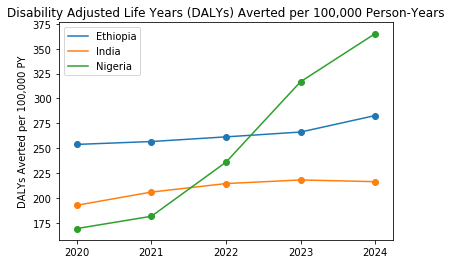

In [19]:
make_plots_by_year_no_uncertainty(averted_by_year,'dalys')

# India results should not *decrease* overtime after 2021?
# Also, plots should start at zero at 2020?

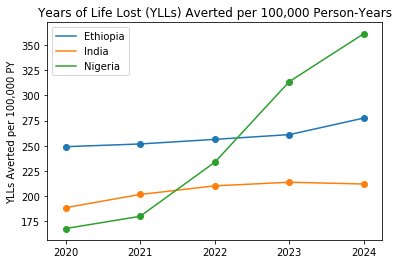

In [20]:
make_plots_by_year_no_uncertainty(averted_by_year,'ylls')

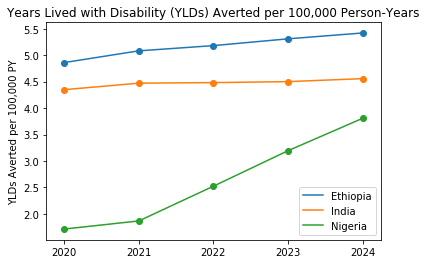

In [21]:
make_plots_by_year_no_uncertainty(averted_by_year,'ylds')

In [22]:
def make_plots_by_year_with_uncertainty(dataset, outcome_var):
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'

    data = pd.DataFrame.copy(dataset).reset_index()
    ethiopia = data.where(data['location'] == 'Ethiopia').dropna()
    india = data.where(data['location'] == 'India').dropna()
    nigeria = data.where(data['location'] == 'Nigeria').dropna()

    plt.scatter(ethiopia['year'], ethiopia[outcome_var,'mean'])
    plt.plot(ethiopia['year'], ethiopia[outcome_var,'mean'])

    plt.scatter(india['year'], india[outcome_var,'mean'])
    plt.plot(india['year'], india[outcome_var,'mean'])

    plt.scatter(nigeria['year'], nigeria[outcome_var,'mean'])
    plt.plot(nigeria['year'], nigeria[outcome_var,'mean'])
    
    plt.plot(ethiopia['year'],ethiopia['dalys','min'],linestyle='dashed',c='tab:blue')
    plt.plot(ethiopia['year'],ethiopia['dalys','max'],linestyle='dashed',c='tab:blue')

    plt.plot(india['year'],india['dalys','min'],linestyle='dashed',c='tab:orange')
    plt.plot(india['year'],india['dalys','max'],linestyle='dashed',c='tab:orange')

    plt.plot(nigeria['year'],nigeria['dalys','min'],linestyle='dashed',c='tab:green')
    plt.plot(nigeria['year'],nigeria['dalys','max'],linestyle='dashed',c='tab:green')

    plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.legend(['Ethiopia','India','Nigeria'])
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')
    #plt.savefig('ethiopia_and_nigeria_by_year.png')

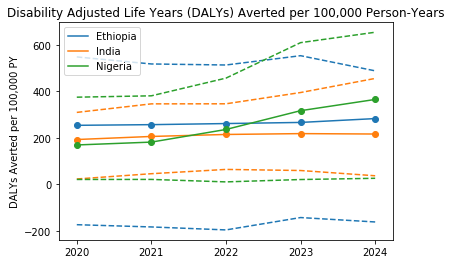

In [23]:
make_plots_by_year_with_uncertainty(averted_by_year,'dalys')

In [24]:
overall_results.head()

input_draw                                                       \
              count    mean        std   min    25%    50%    75%    max   
location                                                                   
Ethiopia       25.0  437.52  260.12547  21.0  232.0  482.0  629.0  946.0   
India          25.0  437.52  260.12547  21.0  232.0  482.0  629.0  946.0   
Nigeria        25.0  437.52  260.12547  21.0  232.0  482.0  629.0  946.0   

         ylls_baseline                ... deaths_intervention_rate  \
                 count          mean  ...                      75%   
location                              ...                            
Ethiopia          25.0  5.503120e+05  ...                85.286921   
India             25.0  2.569654e+05  ...                42.951132   
Nigeria           25.0  1.094227e+06  ...               175.719863   

                     deaths                                                    \
                 max  count      mean       std       min       25%       50%   
location                                                                        
Ethiopia  108.074665   25.0  3.025250  1.999118 -1.937645  2.178490  3.552710   
India      46.805767   25.0  2.393337  0.977155  0.673714  1.652695  2.549901   
Nigeria   193.749296   25.0  3.052793  1.338499  0.230597  2.427719  2.769838   

                              
               75%       max  
location                      
Ethiopia  4.341968  5.495183  
India     3.108803  4.086093  
Nigeria   3.917962  5.708301  

[3 rows x 184 columns]

In [25]:
# define plotting function for overall, non-stratified results
# NOTE: spacing will need to be edited when India results are completed

def make_dot_plots(dataset, outcome_var):
    data = pd.DataFrame.copy(dataset)
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'
        
    pos1 = 0.2
    pos2 = 0.4
    pos3 = 0.6    
        
    plt.plot([(pos1 - 0.1),(pos3 + 0.1)],[0,0],'--',c='grey')

    plt.plot([pos1,pos1],[data[outcome_var,'min'][0],data[outcome_var,'max'][0]],c='black')
    plt.plot([pos2,pos2],[data[outcome_var,'min'][1],data[outcome_var,'max'][1]],c='black')
    plt.plot([pos3,pos3],[data[outcome_var,'min'][2],data[outcome_var,'max'][2]],c='black')
    plt.scatter([pos1,pos2,pos3],data[outcome_var,'min'], marker='_',c='black',s=50)
    plt.scatter([pos1,pos2,pos3],data[outcome_var,'max'], marker='_',c='black',s=50)

    plt.scatter([pos1,pos2,pos3],data[outcome_var,'mean'], s=100)

    plt.xticks([pos1,pos2,pos3], data.index)
    if outcome_var == 'deaths':
        plt.title(f'{outcome_name_long} Averted per 100,000 Person-Years')
    else:
        plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')

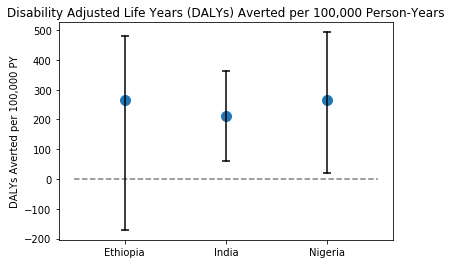

In [26]:
make_dot_plots(overall_results, 'dalys')

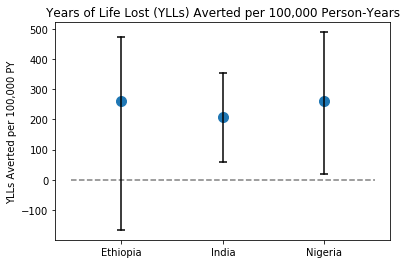

In [27]:
make_dot_plots(overall_results, 'ylls')

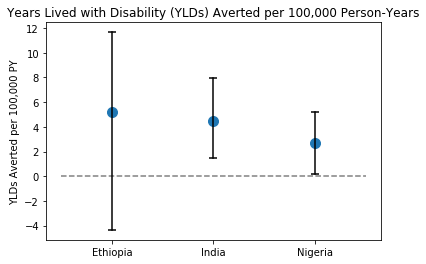

In [28]:
make_dot_plots(overall_results, 'ylds')

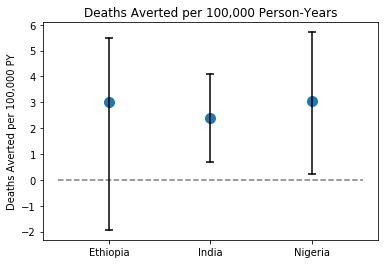

In [29]:
make_dot_plots(overall_results, 'deaths')